# Partial Pivoting
## An empirical demonstration of its need

### Checking the stability of the solution as a function of the first pivot

### Strategy:

**We will study by how much the solution x  in Ax=b varies as the first pivot point of A gets smaller. Towards that end,
we will take the following strategy -**

<ol>
<li>We will take an arbitrary square matrix A of size mxm.</li>
    
<li>
We will decide upon a statistic that denotes a typical measure of the entries of the first column except the first pivot entry. This might be a minimum, maximum, mean, median etc among the other entries of the first column. Say we take minimum as a statistic.
    <code>
col1_min = np.min(A[1:,0])
</code>
</li>
 
<li>
We will find out the magnitude of the pivot entry relative to col1_min. We will call this the relative value of the pivot entry from now on.
<code>
frac_0 = A[0,0]/col1_min
</code>
</li>

<li>
By varying this relative value of pivot from its initial value frac_0 to almost 0 in STEP(s) we generate a sequence.
<code>
frac_ser = pd.Series(np.arange(start=frac_0, stop = STOP, step=-STEP))
</code>
</li>

<li>
Each entry of this sequence of relative pivot values gives rise to a corresponding actual pivot value. These actual pivot values form a sequence of pivots. Thus we obtain a sequence of pivots gradually decreasing and eventually becoming negligibly small compared to other entries of the first column.
<code>
pivot_ser = frac_ser*col1_min
</code>
</li>
    
<li>
Now each of these pivot entries produce a matrix. We have a sequence of matrices where the pivot entry varies across the matrices.
</li>
    
<li>
Each such matrix produces a solution x for Ax=b. We choose a fixed arbitrary b. The solutions produce a sequence of solution points.
</li>
    
<li>
From each solution to the next there is a change. The magnitude of the relative change of the solution we need to study. Say two consecutive solutions are x0 and x1 respectively. The change is (x1-x0). We need to study magnitude(x1-x0)/magnitude(x0). This is the relative change of the solution for each STEP change in the relative value of pivot. The sequence of solutions provide us with a sequence of such relative changes in solution.
</li>
    
<li>
The relative changes derived above is plotted against the relative pivot values.
</li>

</ol>
    
**Expectation**
<blockquote>
We expect to see a spike in the relative change of the solution as the relative value of the pivot decreases. If we do see such a phenomenon we can get a sort of justification for using the approach of partial pivoting.
</blockquote>
     
**Some additional and noteworthy points**
<ul>
    <li>We will discard any singular matrix we face. We will discard the corresponding relative pivot value data-point as well.</li>
    <li>We will perform this study on 100 different square matrices for any given size (say 2x2). We will not generate a plot for each of these. We will record the relative value of pivot at which the maximum change in relative value of solution is observed. We will try to see if there is a typical relative pivot value at which this maximum solution instability occurs.</li>
    <li>We will perform this study in turns on matrices of various sizes and record the variation of the typical (or mean) relative pivot value with the size.</li>
</ul>    

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Setting some basic parameters

In [2]:
N = 2  # Size of the matrix: NxN.
STEP = 0.01  # Amount by which the relative pivot value is changed in each step.
LOW = 1
HIGH = 10  # low and high limits for the matrix entries.
STOP = 0.001  # lowest relative pivot value

### 2. Declaring the matrix A and vector b

In [3]:
A = np.array(np.random.random_integers(low=LOW, high=HIGH, size=(N,N)), dtype='float64')
A[0,0]=10.0  #Pivot value is set to maximum value and will vary over the entire possible range.
A

E:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  """Entry point for launching an IPython kernel.


array([[10.,  5.],
       [ 5.,  6.]])

In [4]:
b=np.array(np.random.random_integers(low=1, high=3*10, size=(2,)), dtype='float64').transpose()
b

E:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 30 + 1) instead
  """Entry point for launching an IPython kernel.


array([24.,  6.])

### 3. Finding a measure of the non-pivot entries of the first column
#### statistic = minimum

In [5]:
col1_min = np.min(A[1:,0])
col1_min

5.0

### 4. Sequence of relative pivot values

In [6]:
frac_0 = A[0,0]/col1_min
frac_0

2.0

In [7]:
# The fraction series is created as a series instead of ndarray so that its size may be amended in place later on.
frac_ser = pd.Series(np.arange(start=frac_0, stop = STOP, step=-(STEP)))
frac_ser

0      2.00
1      1.99
2      1.98
3      1.97
4      1.96
       ... 
195    0.05
196    0.04
197    0.03
198    0.02
199    0.01
Length: 200, dtype: float64

### 5. Sequence of actual pivot values

In [8]:
pivot_ser = frac_ser*col1_min
pivot_ser[0] = A[0,0]  # Restoring the intial pivot value as the original A[0,0] entry. 
                        # But pivot_ser[0] might be A[0,0] already. Hence this is possibly a redundant step.
pivot_ser

0      10.00
1       9.95
2       9.90
3       9.85
4       9.80
       ...  
195     0.25
196     0.20
197     0.15
198     0.10
199     0.05
Length: 200, dtype: float64

### 6. Sequence of matrices

In [9]:
matrix_ser = []
for new_pivot in pivot_ser:
    A_new = np.copy(A)
    A_new[0,0] = new_pivot
    matrix_ser.append(A_new)

In [10]:
matrix_ser[-1]

array([[0.05, 5.  ],
       [5.  , 6.  ]])

### 7. Sequence of solutions

In [11]:
soln_ser = pd.DataFrame(np.zeros((N,1)))  # initializing a dataframe whose columns will hold the solutions
soln_ser

,0
0,0.0
1,0.0


In [12]:
for i in range(len(matrix_ser)):
    if np.linalg.matrix_rank(matrix_ser[i]) < N:
        print('Deleted index', i, 'with value', frac_ser[i], 'from frac_ser')
        frac_ser.drop(labels=[i], inplace=True)
    else:
        soln = pd.DataFrame(np.linalg.solve(a=matrix_ser[i], b=b).transpose())
        soln_ser[i] = soln

In [13]:
soln_ser

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,3.257143,3.285303,3.313953,3.343109,3.372781,3.402985,3.433735,3.465046,3.496933,3.529412,...,-5.181818,-5.112108,-5.044248,-4.978166,-4.913793,-4.851064,-4.789916,-4.730290,-4.672131,-4.615385
1,-1.714286,-1.737752,-1.761628,-1.785924,-1.810651,-1.835821,-1.861446,-1.887538,-1.914110,-1.941176,...,5.318182,5.260090,5.203540,5.148472,5.094828,5.042553,4.991597,4.941909,4.893443,4.846154


In [14]:
frac_ser.index = np.arange(len(frac_ser))  # Reindexing frac_ser because a few entries might have been dropped when
                                            # corresponding matrix was singular.
frac_ser

0      2.00
1      1.99
2      1.98
3      1.97
4      1.96
       ... 
195    0.05
196    0.04
197    0.03
198    0.02
199    0.01
Length: 200, dtype: float64

### 8. Sequence of changes in solution

In [15]:
change_ser = pd.DataFrame(np.zeros((N,1)))
change_ser

,0
0,0.0
1,0.0


In [16]:
for i in range(len(soln_ser.columns)-1):
    change_ser[i] = soln_ser[i+1]-soln_ser[i]
change_ser

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
0,0.028160,0.028651,0.029155,0.029673,0.030204,0.030750,0.031311,0.031887,0.032479,0.033088,...,0.071638,0.069711,0.06786,0.066082,0.064373,0.062729,0.061148,0.059626,0.058159,0.056747
1,-0.023466,-0.023876,-0.024296,-0.024727,-0.025170,-0.025625,-0.026092,-0.026572,-0.027066,-0.027574,...,-0.059698,-0.058092,-0.05655,-0.055068,-0.053644,-0.052274,-0.050957,-0.049688,-0.048466,-0.047289


### 9. Sequence of relative changes in solution

If for a change in the relative pivot value from f0 to f1 the solution changes from x0 to x1, the relative change in the solution is given by -
    <blockquote>
    fractional_change_0 = (mag(x1-x0)/mag(x0)).(STEP/(f0-f1)) ...............here mag(x) denotes the magnitude of vector x.
    This is the relative change of the solution when the relative pivot value is at f0.
    </blockquote>
    
**An additional point here is the multiplication factor STEP/(f0-f1). Non-sigular matrices led to removal of certain entries from frac_ser. So f0-f1 can be k*STEP where k is some integer 1, 2, 3, . . . We want to study the change in the solution per unit STEP change in relative value of pivot. Hence this scaling is done.**

**We generate two sequences for ease of calculation -** 
<ul>
    <li>change_mag_ser for mag(x_i - x_i-1)</li>
    <li>soln_mag_ser for mag(x_i)</li>
</ul>

In [17]:
change_mag_ser = np.sqrt(np.square(change_ser).sum(axis=0))
soln_mag_ser = np.sqrt(np.square(soln_ser).sum(axis=0))

In [18]:
change_mag_ser

0      0.036656
1      0.037295
2      0.037951
3      0.038625
4      0.039317
         ...   
194    0.081655
195    0.079597
196    0.077615
197    0.075706
198    0.073867
Length: 199, dtype: float64

In [19]:
soln_mag_ser

0      3.680728
1      3.716584
2      3.753081
3      3.790237
4      3.828069
         ...   
195    6.997154
196    6.918044
197    6.840914
198    6.765692
199    6.692308
Length: 200, dtype: float64

**Now the sequence of relative changes in solution  - fractional_chng_ser -**

In [20]:
fractional_chng_ser = pd.Series([0], dtype='float64')
fractional_chng_ser

0    0.0
dtype: float64

In [21]:
for i in range(len(change_mag_ser)):
    fractional_chng_ser[i] = (change_mag_ser[i]/soln_mag_ser[i])*(STEP/(frac_ser[i]-frac_ser[i+1]))
fractional_chng_ser

0      0.009959
1      0.010035
2      0.010112
3      0.010191
4      0.010271
         ...   
194    0.011536
195    0.011376
196    0.011219
197    0.011067
198    0.010918
Length: 199, dtype: float64

### 10. Plotting the relative changes in solutions against relative pivot values

We will plot the relative pivot values along the x-axis and relative changes in solutions along y-axis.

**A noteworthy point:**
<blockquote>
The range of the y-values will determine the range of the y-axis. However it has been observed that an extremely small percentage of y-values may be very excessively large. For example when <code>A = [[4., 1.],[2., 5.]]</code> is used as the initial matrix, the maximum value of relative change in solution is 627640824721969.4. However, 95% of the relative change in solution values vary from 0 to 20. If all of the y-values are included in the plot, the range of y-axis will turn out to be such that the variation of most of the y-values from 0 to 20 will go unnoticed.
To avoid this we will set the y-axis range such that it includes 95% of the data-points. We let go a small percentage of the data points to gain better visual clarity.
</blockquote>

In [22]:
x_data = frac_ser[:len(frac_ser)-1]  
'''
Relative pivot points --> f0, f1, ..., fn
Solutions --> x0, x1, ..., xn
Solution change x1-x0 is plotted against f0; xn-x(n-1) is plotted against f(n-1).
Hence x_data excludes the last data point from frac_ser
'''
y_data = fractional_chng_ser
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [23]:
sub1 = fig.add_subplot(1,1,1)

In [24]:
# We will take the y-axis range so as to include the data-points within 2.5-97.5 percentile range.
range_ser = y_data.quantile(q=[0.025, 0.975, 1.0])
ymin = np.floor(range_ser[0.025])
ymax = np.ceil(range_ser[0.975])
plot_props = {
    'ylim': (ymin, ymax),
    'title': 'Dependence of solution stability on first pivot entry',
    'xlabel': 'relative pivot value',
    'ylabel': 'relative solution change'
}

In [25]:
sub1.set(**plot_props)

[(0.0, 1.0),
 Text(0, 0.5, 'relative solution change'),
 Text(0.5, 0, 'relative pivot value'),
 Text(0.5, 1.0, 'Dependence of solution stability on first pivot entry')]

In [26]:
sub1.plot(x_data, y_data, color='b', marker='.', linestyle='-')

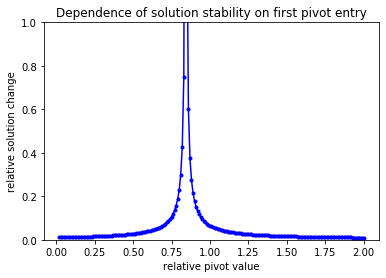

In [27]:
fig

### 11. The relative pivot value showing maximum solution instability

In [28]:
pivot_max = x_data[y_data.idxmax()]
pivot_max

0.839999999999999

### 12. Conclusion

We see that as the relative pivot value decreases there is a spike in the relative changes of solution i.e., solution instability increases sharply. **If this plot nature turns out to be typical** then doing a row exchange during Gauss elimination to ensure maximum value in a column acts as a pivot indeed makes a solution more stable, prtecting it from errors. That is because using the maximum column value as a pivot will keep the relative pivot value large (towards the extreme right of the plot) and the solution stable.

**The need for further investigation:**<br></br>
However this above conclusion says - **"If this plot nature turns out to be typical"**. This needs to be investigated. To investigate that we will perform the last two steps mentioned under **"Some additional and noteworthy points"** in the **Strategy** section at the very beginning. While this notebook demonstrated the strategy over one matrix, the same strategy will be repeated over many matrices of various sizes in _________________.py. 